In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\zarim\appdata\local\programs\python\python313\lib\site-packages (6.1.1)




[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Importamos las librerias necesarias para la realización de nuestro EDA:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [18]:
df = pd.read_csv("Titanic Dataset.csv")

In [19]:
# Visualizamos las primeras filas
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
df = pd.read_csv("Titanic Dataset.csv")
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0        

In [ ]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [ ]:
num_vars = df.select_dtypes(include=["number"]).columns.tolist()
print("Variables numéricas:", num_vars)

cat_vars = df.select_dtypes(include=["object"]).columns.tolist()
print("Variables categóricas:", cat_vars)

Variables numéricas: ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']
Variables categóricas: ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


In [ ]:
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values[missing_values > 0])


Valores faltantes por columna:
age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


#### ***Análisis Exploratorio de Datos (EDA)***
- *El dataset cuenta con ***1309 registros y 14 columnas***.*
- *Variables identificadas*:
  - ***Numéricas:*** *`age`*, *`sibsp`*, *`parch`*, *`fare`*.
  - ***Categóricas nominales:*** *`sex`*, *`embarked`*.
  - ***Categórica ordinal:*** *`pclass`* *(orden 1 < 2 < 3)*.
  - ***Texto:*** *`name`*, *`cabin`*, *`ticket`*, *`home.dest`*.
- *Presencia de datos faltantes:*
  - *`age` (~20%)*, *`fare` (1 valor)*, *`embarked` (2 valores)*.
  - *`cabin`*, *`body`*, *`home.dest` tienen gran proporción de nulos.*
- *Variables con poca relevancia o demasiados nulos (`ticket`,`boat`, `body`, `home.dest`) fueron descartadas.*
- *Ingeniería propuesta:*
  - ***Title*** *(extraído de `name`).*
  - ***FamilySize*** *(a partir de `sibsp` + `parch` + 1)*.
  - ***Cabin indicator*** *(1 si hay dato en `cabin`, 0 si no).*

Text(0.5, 1.0, 'Distribución de Fare')

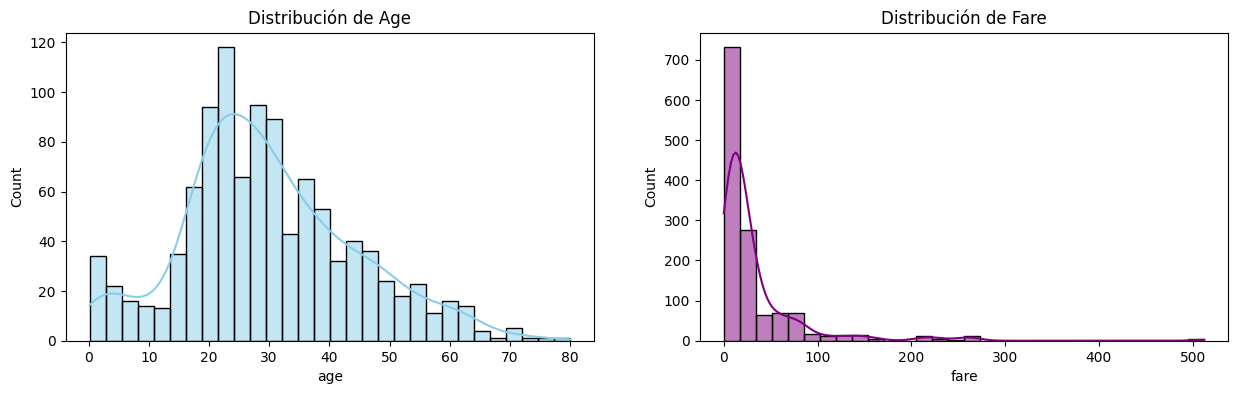

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(df["age"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribución de Age")

sns.histplot(df["fare"], bins=30, kde=True, ax=axes[1], color="purple")
axes[1].set_title("Distribución de Fare")

  - *En la primera tabla de distribución, observamos que la mayoria de los pasajeros tenia entre 20 y 40 años, con un pico alrededor de los 22 años, esta distribución es parecida a una campana, aunque esta sesgada a la derecha, lo que sugiere que las personas con edades entre 70-80 años son escasos. La mediana es un buen estimador para imputar los valores faltantes.*

  - *En la segunda tabla de distribución, observamos que la mayoría de los pasajeros pago la tarifa más baja, además, la cola larga hacia la derecha demuestra que habían boletos muy costosos. Esto muestra que **fare** tiene una distribucion muy sesgada, lo que sugiere que habia diferentes clases socioeconómicas, con muy pocos pasajeros que pagaron la clase premium.*

In [ ]:
df = pd.read_csv("Titanic Dataset.csv")
X = df[cols_usar]
y = df["survived"]
full_pipeline.fit(X, y)

Pipeline(steps=[('cabin_bin',
                 FunctionTransformer(func=<function procesar_cabin at 0x000001D4DE704EA0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'cabin'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

  - *El pipeline encapsula todo el flujo de preparación y modelado, asegurando que cualquier conjunto de datos pase exactamente por las mismas etapas antes de generar predicciones. Esto aumenta la robustez, la claridad y la escalabilidad del proyecto.*

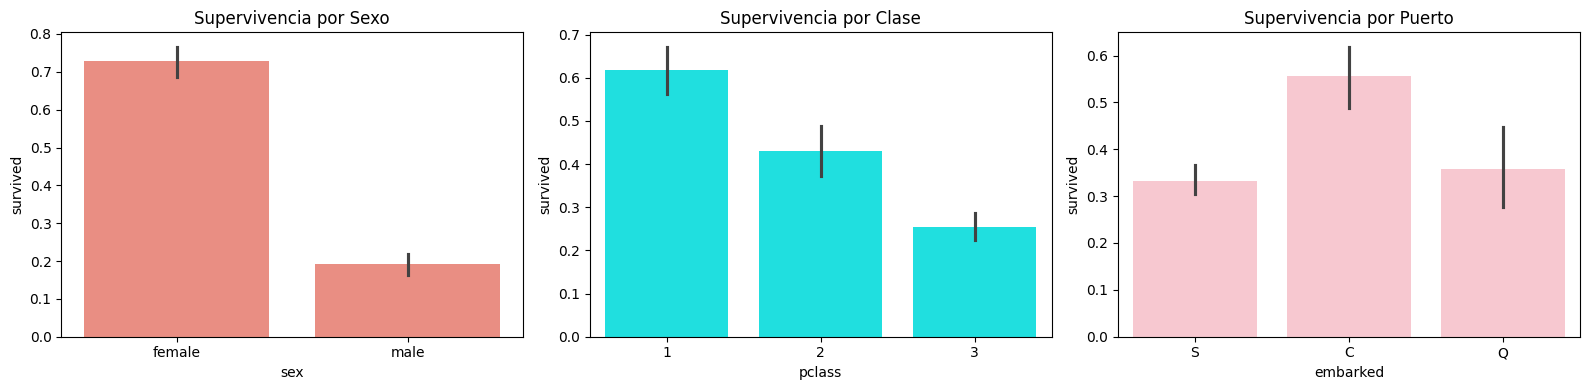

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))
sns.barplot(data=df, x="sex", y="survived", ax=axes[0], color="salmon")
axes[0].set_title("Supervivencia por Sexo")

sns.barplot(data=df, x="pclass", y="survived", ax=axes[1], color="cyan")
axes[1].set_title("Supervivencia por Clase")

sns.barplot(data=df, x="embarked", y="survived", ax=axes[2], color="pink")
axes[2].set_title("Supervivencia por Puerto")
plt.tight_layout()
plt.show()

  - *En la primera tabla observamos que las mujeres (female) presentan una tasa de supervivencia alrededor del 72%, mientras que los hombres (male) apenas alcanzaron cerca del 19%, esto refleja las medidas aplicadas durante el desastre, que sería mujeres y niños primero, lo que favoreció a las pasajeras*

  - *En la segunta tabla podemos observar que la primera clase tenian la probabilidad más alta de sobrevivir aproximadamente del 62%, en la clase media la supervivencia baja aproximadamente a 45% y la clase baja  apenas alcanza el 25% de supervivencia. Esto evidencia que la ubicación de las camas y las condiciones socioeconomicas influyeron en el acceso a los botes y salidas de emergencia*

  - *En la tercera tabla se evidencia que los pasajeros que embarcaron en Cherbourg, Queenstown y Southampton, obtuvieron supervivencia aproximadamente del 55%, 33% y 35% respectivamente. Esto puede relacionarse con el tipo de boletos adquiridos en cada puerto, los que embarcaron en Cherbourg tendian a pertenecer a la clase más alta*

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar features y target
X = df[cols_usar]
y = df["survived"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar
full_pipeline.fit(X_train, y_train)

# Predecir
y_pred = full_pipeline.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.8206106870229007

Matriz de confusión:
 [[139  23]
 [ 24  76]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       162
           1       0.77      0.76      0.76       100

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



  - *En esta matriz de confusión:*
    - *El valor 76 son los sobrevivientes correctamente identificados.*
    - *El valor 139 no son los sobrevivientes identificados.*
    - *El valor 23 es la predicción de sobrevivir pero no lo fue*
    - *El valor 24 es la predicción de no sobrevivir pero si lo fue*
  - *La clasebaja no sobrevivió tiene mejor F1 (0.86) que la clase alta (0.76)*
    *En conclusión el modelo predice con mayor seguridad los no sobrevivientes, aunque mantiene un rendimiento razonable para los sobrevivientes.*

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class CabinTransformer(BaseEstimator, TransformerMixin):
    """cabin -> 1 si hay valor, 0 si NaN"""
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X["cabin"] = X["cabin"].notnull().astype(int)
        return X

class TitleTransformer(BaseEstimator, TransformerMixin):
    """title a partir de name (Mr, Mrs, Miss, etc.) y agrupación de raros"""
    MAP = {
        "Mlle":"Miss","Ms":"Miss","Mme":"Mrs",
        "Dr":"Other","Rev":"Other","Col":"Other","Major":"Other","Lady":"Other","Sir":"Other",
        "Jonkheer":"Other","Don":"Other","Dona":"Other","Countess":"Other","Capt":"Other"
    }
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        if "name" in X:
            t = X["name"].astype(str).str.extract(r",\s*([^\.]+)\.", expand=False).fillna("Unknown")
            X["title"] = t.map(lambda v: self.MAP.get(v.strip(), v.strip()))
            X.loc[~X["title"].isin(["Mr","Mrs","Miss","Master"]), "title"] = "Other"
        else:
            X["title"] = "Unknown"
        return X

class FamilySizeAdder(BaseEstimator, TransformerMixin):
    """family_size = sibsp + parch + 1"""
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X["family_size"] = X["sibsp"].fillna(0) + X["parch"].fillna(0) + 1
        return X

# (Opcional) Discretización de tarifa en cuartiles
class FareBinTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X["fare_bin"] = pd.qcut(X["fare"], 4, labels=["Low","MedLow","MedHigh","High"])
        return X


In [30]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# columnas base (usa 'name' porque TitleTransformer lo necesita)
base_cols = ["pclass","sex","age","sibsp","parch","fare","cabin","embarked","name"]

# Ingeniería de características (BONUS) ANTES del ColumnTransformer
feat_eng = Pipeline([
    ("cabin_bin", CabinTransformer()),
    ("title", TitleTransformer()),
    ("family", FamilySizeAdder()),
    # ("fare_bins", FareBinTransformer()),  # <- activa si quieres usar bins categóricos de 'fare'
])

# Variables tras feat eng
num_cols = ["age","sibsp","parch","fare","family_size"]
cat_nom = ["sex","embarked","title"]  # + "fare_bin" si activas FareBinTransformer
cat_ord = ["pclass"]
ord_categories = [[1,2,3]]  # 1<2<3

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())  # quítalo si usas RandomForest/XGBoost
])

cat_nom_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

cat_ord_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(categories=ord_categories))
])

pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("nom", cat_nom_pipe, cat_nom),
    ("ord", cat_ord_pipe, cat_ord),
], remainder="drop")

clf = Pipeline([
    ("feat", feat_eng),
    ("pre", pre),
    ("model", LogisticRegression(max_iter=1000))
])

In [31]:
df = pd.read_csv("Titanic Dataset.csv")
X = df[base_cols]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.8358778625954199
Matriz de confusión:
 [[143  19]
 [ 24  76]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       162
           1       0.80      0.76      0.78       100

    accuracy                           0.84       262
   macro avg       0.83      0.82      0.82       262
weighted avg       0.83      0.84      0.84       262



c:\Users\zarim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  - *Esta nueva matriz de confusión mejorada añadiendo los custom transformers, la interpretación es muy parecida a la anterior, pero con una mejora en el desempeño:*
    - *Mantiene un alto desempeño para los no sobrevientes (F1=0.87)*
    - *Mejora la predicción de los sobrevivientes (F1=0.78)*
  - *Las features de ingeniería fueron aporte positivo, brindando un modelo más preciso sin perder la simplicidad.*

***Comparación de matrices de confusión***
   - *Observamos que el accuracy subió de 0.82 a 0.84*
   - *La F1-score de la clase alta de sobrevivientes pasó de 0.76 a 0.78*
   - *El recall en la clase baja de no sobrevivió mejoró de 0.86 a 0.88*
- *Esto confirma que las nuevas variables aportaron información mas relevante para separar mejor ambas clases.*

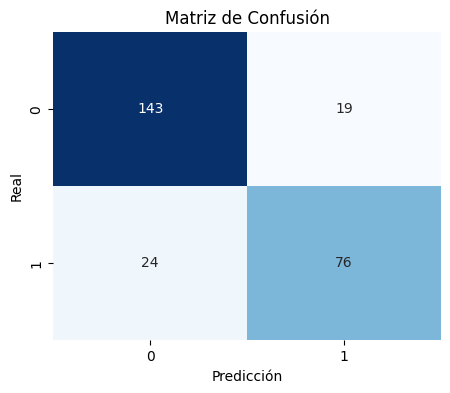

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()